In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [3]:
pd.read_csv('who_data.csv', encoding='latin-1')

,country,code,region,income,year,Current Health Expenditure % of GDP,Current Health Expenditure Per Capita (USD),Expenditure on Contraceptive Management as % of Current Health Expenditure,Population(thousands),Difference in POP,Unnamed: 10,Population Growth Rate(%),Current Health Expenditure(millions USD),Contraceptive Management Per Capita (USD),Consumption Expenditure Per Capita(USD)
0,Algeria,DZA,AFR,Lower-middle,2001,3.837877,67.338501,NaN,31200.9855,426.3645,1.366510,1.366510,2101.027653,NaN,766.939954
1,Algeria,DZA,AFR,Lower-middle,2002,3.730042,66.947601,NaN,31624.6955,423.7100,1.339807,1.339807,2117.197412,NaN,789.431131
2,Algeria,DZA,AFR,Lower-middle,2003,3.601041,76.235474,NaN,32055.8835,431.1880,1.345113,1.345113,2443.795446,NaN,857.045800
3,Algeria,DZA,AFR,Lower-middle,2004,3.544073,93.024330,NaN,32510.1860,454.3025,1.397416,1.397416,3024.238369,NaN,1012.077808
4,Algeria,DZA,AFR,Lower-middle,2005,3.235161,101.303734,NaN,32956.6905,446.5045,1.354822,1.354822,3338.635686,NaN,1057.167134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,Viet Nam,VNM,WPR,Lower-middle,2016,4.518536,124.743996,NaN,93126.5285,935.1310,1.004151,1.004151,11616.975970,NaN,1510.868980
3836,Viet Nam,VNM,WPR,Lower-middle,2017,4.712835,141.011383,NaN,94033.0480,906.5195,0.964044,0.964044,13259.730550,NaN,1619.066173
3837,Viet Nam,VNM,WPR,Lower-middle,2018,5.049667,164.236679,NaN,94914.3305,881.2825,0.928503,0.928503,15588.414850,NaN,1745.739718
3838,Viet Nam,VNM,WPR,Lower-middle,2019,5.033952,173.650452,NaN,95776.7165,862.3860,0.900413,0.900413,16631.669070,NaN,1864.034871


In [4]:
who_df = pd.read_csv('who_data.csv', encoding='latin-1')
who_df.head()

,country,code,region,income,year,Current Health Expenditure % of GDP,Current Health Expenditure Per Capita (USD),Expenditure on Contraceptive Management as % of Current Health Expenditure,Population(thousands),Difference in POP,Unnamed: 10,Population Growth Rate(%),Current Health Expenditure(millions USD),Contraceptive Management Per Capita (USD),Consumption Expenditure Per Capita(USD)
0,Algeria,DZA,AFR,Lower-middle,2001,3.837877,67.338501,NaN,31200.9855,426.3645,1.366510,1.366510,2101.027653,NaN,766.939954
1,Algeria,DZA,AFR,Lower-middle,2002,3.730042,66.947601,NaN,31624.6955,423.7100,1.339807,1.339807,2117.197412,NaN,789.431131
2,Algeria,DZA,AFR,Lower-middle,2003,3.601041,76.235474,NaN,32055.8835,431.1880,1.345113,1.345113,2443.795446,NaN,857.045800
3,Algeria,DZA,AFR,Lower-middle,2004,3.544073,93.024330,NaN,32510.1860,454.3025,1.397416,1.397416,3024.238369,NaN,1012.077808
4,Algeria,DZA,AFR,Lower-middle,2005,3.235161,101.303734,NaN,32956.6905,446.5045,1.354822,1.354822,3338.635686,NaN,1057.167134


In [5]:
who_df.rename(columns={'Column1':'Population Growth Rate(%)','che_gdp':'Current Health Expenditure % of GDP',
                       'che_pc_usd':'Current Health Expenditure Per Capita (USD)',
                       'dis23_che':'Expenditure on Contraceptive Management as % of Current Health Expenditure',
                      'pop':'Population(thousands)', 'che_usd':'Current Health Expenditure(millions USD)',
                      'dis23_usd_pc':'Contraceptive Management Per Capita (USD)',
                      'pfc_usd_pc':'Consumption Expenditure Per Capita(USD)'},inplace=True)



In [6]:
who_df.replace(',','', regex=True, inplace=True)

In [7]:
who_df.head()

,country,code,region,income,year,Current Health Expenditure % of GDP,Current Health Expenditure Per Capita (USD),Expenditure on Contraceptive Management as % of Current Health Expenditure,Population(thousands),Difference in POP,Unnamed: 10,Population Growth Rate(%),Current Health Expenditure(millions USD),Contraceptive Management Per Capita (USD),Consumption Expenditure Per Capita(USD)
0,Algeria,DZA,AFR,Lower-middle,2001,3.837877,67.338501,NaN,31200.9855,426.3645,1.366510,1.366510,2101.027653,NaN,766.939954
1,Algeria,DZA,AFR,Lower-middle,2002,3.730042,66.947601,NaN,31624.6955,423.7100,1.339807,1.339807,2117.197412,NaN,789.431131
2,Algeria,DZA,AFR,Lower-middle,2003,3.601041,76.235474,NaN,32055.8835,431.1880,1.345113,1.345113,2443.795446,NaN,857.045800
3,Algeria,DZA,AFR,Lower-middle,2004,3.544073,93.024330,NaN,32510.1860,454.3025,1.397416,1.397416,3024.238369,NaN,1012.077808
4,Algeria,DZA,AFR,Lower-middle,2005,3.235161,101.303734,NaN,32956.6905,446.5045,1.354822,1.354822,3338.635686,NaN,1057.167134


In [8]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 15 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   country                                                                     3840 non-null   object 
 1   code                                                                        3840 non-null   object 
 2   region                                                                      3840 non-null   object 
 3   income                                                                      3840 non-null   object 
 4   year                                                                        3840 non-null   int64  
 5   Current Health Expenditure % of GDP                                         3774 non-null   float64
 6   Current Health Expenditure Per Capita (USD)     

In [9]:
who_df.iloc[:,4:]=who_df.iloc[:,4:].astype(np.float64,errors='ignore')

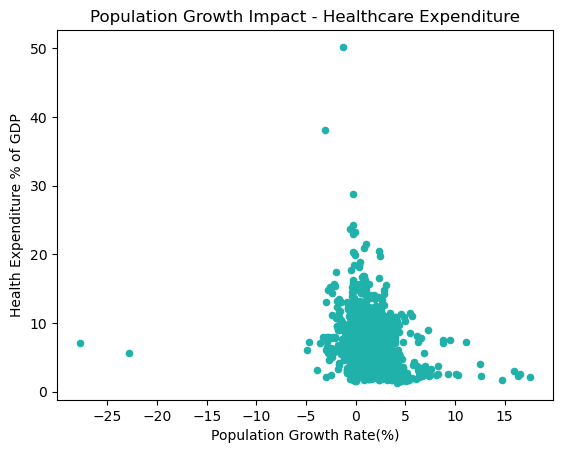

In [10]:
who_df.plot(
    x='Population Growth Rate(%)', 
    y='Current Health Expenditure % of GDP',
    kind ='scatter',color='lightseagreen',
    title = 'Population Growth Impact - Healthcare Expenditure',
    xlabel = 'Population Growth Rate(%)',
    ylabel = 'Health Expenditure % of GDP',
    xticks=np.arange(-25, 20,5)
    )
plt.savefig('Population Growth Impact - Healthcare Expenditure')
plt.show()

In [11]:
group_country_df = who_df.groupby(['country'])

group_country_df=group_country_df[['Population Growth Rate(%)', 'Current Health Expenditure % of GDP']].mean().reset_index()


In [12]:
five_high_country_df = group_country_df.sort_values('Current Health Expenditure % of GDP',ascending=False).head(5)
five_high_country_df

,country,Population Growth Rate(%),Current Health Expenditure % of GDP
125,Niue,-0.335095,16.459147
183,United States of America,0.864247,15.730271
106,Marshall Islands,-1.123813,14.894904
176,Tuvalu,0.687751,14.341414
118,Nauru,0.847082,12.401915


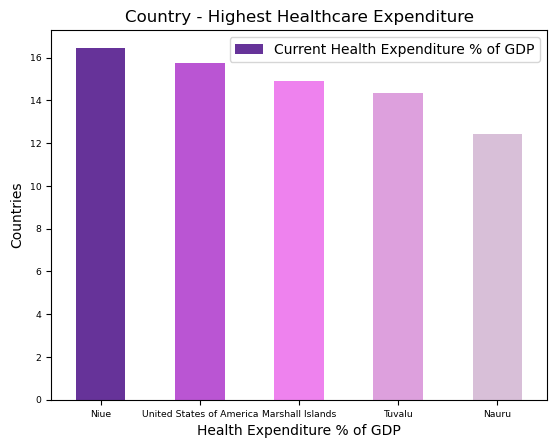

In [13]:
five_high_country_df.plot(
    x='country',
    y='Current Health Expenditure % of GDP',
    kind ='bar',color=tuple(["rebeccapurple", "mediumorchid","violet","plum","thistle"]),
    title = 'Country - Highest Healthcare Expenditure',
    xlabel = 'Health Expenditure % of GDP',fontsize = 6.7,
    ylabel = 'Countries',
)

plt.xticks(rotation=0)
plt.savefig('Country - Highest Healthcare Expenditure')
plt.show()

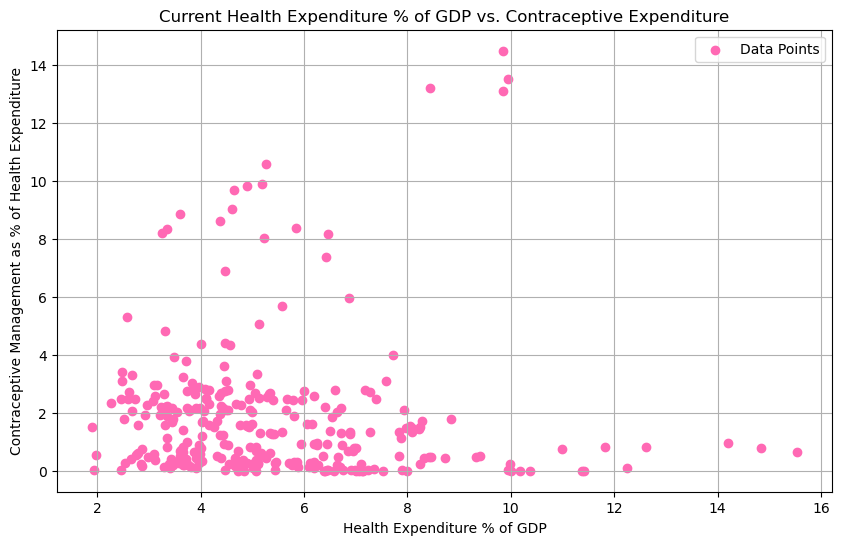

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# # Load data from CSV
df = pd.read_csv('who_data.csv',encoding='latin-1')

# Drop rows with NaN values in 'che_gdp' or 'dis23_che'
df_cleaned = df.dropna(subset=['Current Health Expenditure % of GDP', 'Expenditure on Contraceptive Management as % of Current Health Expenditure'])

# Define DataFrames for specific columns
gdp_df = pd.DataFrame({
    'country': df_cleaned['country'],
    'Current Health Expenditure % of GDP': df_cleaned['Current Health Expenditure % of GDP']
})

contraceptive_df = pd.DataFrame({
    'country': df_cleaned['country'],
    'Expenditure on Contraceptive Management as % of Current Health Expenditure': df_cleaned['Expenditure on Contraceptive Management as % of Current Health Expenditure']
})

# Calculate mode for 'che_gdp' and 'dis23_che'
mode_che_gdp = gdp_df['Current Health Expenditure % of GDP'].mode().values[0]
mode_dis23_che = contraceptive_df['Expenditure on Contraceptive Management as % of Current Health Expenditure'].mode().values[0]

# Scatter plot for Current Health Expenditure % of GDP
plt.figure(figsize=(10, 6))
plt.scatter(gdp_df['Current Health Expenditure % of GDP'], contraceptive_df['Expenditure on Contraceptive Management as % of Current Health Expenditure'], color='hotpink', label='Data Points')

# Plot the mode points
# plt.scatter(mode_Current Health Expenditure % of GDP', mode_Expenditure on Contraceptive Management as % of Current Health Expenditure, color='blue', label=f'Mode ({mode_Current Health Expenditure % of GDP:.2f}, {mode_Expenditure on Contraceptive Management as % of Current Health Expenditure:.2f})', s=100, marker='X'),
# plt.scatter(mode_che_gdp, mode_dis23_che, color='blue', label=f'Mode ({mode_che_gdp:.2f}, {mode_dis23_che:.2f})', s=100, marker='X')

plt.title('Current Health Expenditure % of GDP vs. Contraceptive Expenditure')
plt.xlabel('Health Expenditure % of GDP')
plt.ylabel('Contraceptive Management as % of Health Expenditure')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('che_gdp and dis23_che')
plt.show()

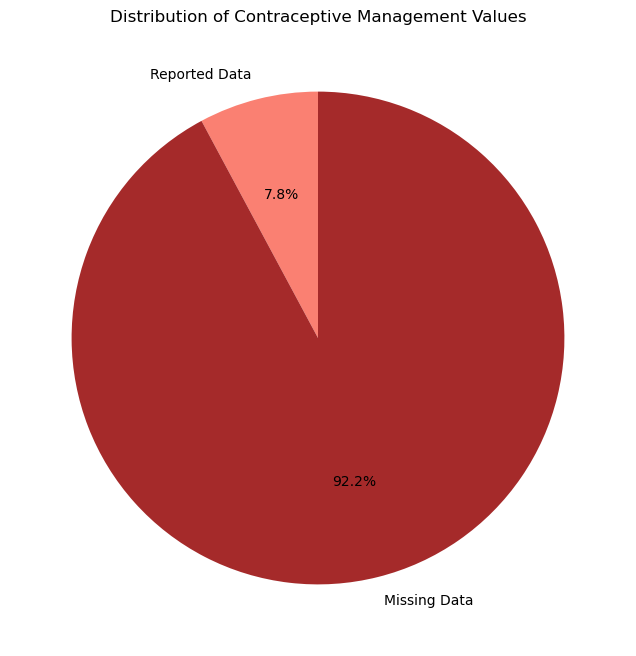

In [15]:
# Assuming 'dis23_che' is the column you're interested in
column_name = 'Expenditure on Contraceptive Management as % of Current Health Expenditure'

# Count the number of non-null and null values
non_null_count = df[column_name].count()
null_count = df[column_name].isnull().sum()

# Create a DataFrame for the pie chart
data = {'Labels': ['Reported Data', 'Missing Data'], 'Values': [non_null_count, null_count]}
df_pie = pd.DataFrame(data)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_pie['Values'], labels=df_pie['Labels'], autopct='%1.1f%%', startangle=90, colors=['salmon', 'brown'])
plt.title(f'Distribution of Contraceptive Management Values')
plt.savefig('Distribution of Contraceptive Management Values')
plt.show()